<a href="https://www.kaggle.com/code/tiwariaman01/taxi-trip-dataset?scriptVersionId=182089498" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Maxmizing Revenue for Taxi Cab Deriver's through the Payment type's analysis.

**Problem Statement**

In the fast paced , taxi booking sector making revenue is very essential for long-term success and deriver happiness.
our duty and goal  is analysis data for data deriven and finding hidden insight's to understand revenue and payment pattern for enhence revenue streams for Taxi deriver's in order to meet their's need.

our aim is to determine that wheather payment method's have an impact on fare pericing by focusing relationship between 
fare amount and payment type's



# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



# Loading dataset

### Data Description

#### VendorID
- **Description:** A code indicating the TPEP (Taxi and Limousine Commission's Taxicab Passenger Enhancement Program) provider that provided the record.
- **Values:** 
  - 1: Creative Mobile Technologies, LLC
  - 2: VeriFone Inc.

#### tpep_pickup_datetime
- **Description:** The date and time when the meter was engaged.

#### tpep_dropoff_datetime
- **Description:** The date and time when the meter was disengaged.

#### Passenger_count
- **Description:** The number of passengers in the vehicle. This is a driver-entered value.

#### Trip_distance
- **Description:** The elapsed trip distance in miles reported by the taximeter.

#### PULocationID
- **Description:** TLC Taxi Zone in which the taximeter was engaged.

#### DOLocationID
- **Description:** TLC Taxi Zone in which the taximeter was disengaged.

#### RateCodeID
- **Description:** The final rate code in effect at the end of the trip.
- **Values:**
  - 1: Standard rate
  - 2: JFK
  - 3: Newark
  - 4: Nassau or Westchester
  - 5: Negotiated fare
  - 6: Group ride

#### Store_and_fwd_flag
- **Description:** This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka "store and forward," because the vehicle did not have a connection to the server.
- **Values:**
  - Y: Store and forward trip
  - N: Not a store and forward trip

#### Payment_type
- **Description:** A numeric code signifying how the passenger paid for the trip.
- **Values:**
  - 1: Credit card
  - 2: Cash
  - 3: No charge
  - 4: Dispute
  - 5: Unknown
  - 6: Voided trip

#### Fare_amount
- **Description:** The time-and-distance fare calculated by the meter.

#### Extra
- **Description:** Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

#### MTA_tax
- **Description:** $0.50 MTA tax that is automatically triggered based on the metered rate in use.

#### Improvement_surcharge
- **Description:** $0.30 improvement surcharge assessed on trips at the flag drop. The improvement surcharge began being levied in 2015.

#### Tip_amount
- **Description:** Tip amount. This field is automatically populated for credit card tips. Cash tips are not included.

#### Tolls_amount
- **Description:** Total amount of all tolls paid in trip.

#### Total_amount
- **Description:** The total amount charged to passengers. Does not include cash tips.

#### Congestion_Surcharge
- **Description:** Total amount collected in trip for NYS congestion surcharge.

In [2]:
df = pd.read_csv('/kaggle/input/yellow-taxi-ny-dataset/df_all.csv')
df.head()

/tmp/ipykernel_18/3933179684.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/yellow-taxi-ny-dataset/df_all.csv')


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


# Data Extraction and Analysis Plan

The objective of this analysis is to conduct an exploratory data analysis (EDA) to preprocess the data. This involves removing unnecessary columns, extracting meaningful insights, and making data-driven decisions. We will apply the Pareto Principle (80/20 rule) to retain only 20% of the data that is most significant based on our requirement analysis and problem statement.

# Exploratory data analysis (EDA)

In [3]:
df.shape

(2463931, 20)

In [4]:
df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
dtype: object

In [5]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [6]:
# removing unnecessary columns

df.drop(['RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'extra',
'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge' , 'total_amount', 'congestion_surcharge'],axis=1,inplace=True, )

df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
# filtered data with relevant columns essential for the analysis
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1,14.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1,8.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1,7.5,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,2,8.0,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1,23.5,0.0


In [8]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# create new  duration variable for analysis.
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60




In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1,14.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1,8.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1,7.5,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,2,8.0,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1,23.5,0.0,37.533333


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   payment_type           int64         
 6   fare_amount            float64       
 7   airport_fee            float64       
 8   duration               float64       
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 169.2 MB


In [11]:
(df.isnull().sum()/df.shape[0])*100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          2.901989
trip_distance            0.000000
payment_type             0.000000
fare_amount              0.000000
airport_fee              2.901989
duration                 0.000000
dtype: float64

In the passenger_count column, we have observed that 3% of the values are missing. Generally, if the proportion of missing values is less than 5%, one approach could be to simply drop these missing values. However, there are also alternatives to handle these missing values, such as replacing them with the mean, median, or through random imputation.

i have decided to replace these column value with the help of random imputaion.

In [12]:
# random imputation methods for repalceing missing value randomly.
df['passenger_count'][df['passenger_count'].isnull()] = df['passenger_count'].dropna().sample(df['passenger_count'].isnull().sum()).values

/tmp/ipykernel_18/88757279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['passenger_count'][df['passenger_count'].isnull()] = df['passenger_count'].dropna().sample(df['passenger_count'].isnull().sum()).values


In [13]:
df[df.duplicated()].shape[0]

176

In [14]:
# removing duplicate value's
df.drop_duplicates(inplace = True)

In [15]:
df.shape

(2463755, 9)

In [16]:
df[['passenger_count','trip_distance','payment_type','fare_amount','duration']].describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,2463755.0,1.389315,0.982726,0.0,1.000000,1.000000,1.000000,9.000000
trip_distance,2463755.0,5.372979,547.890971,0.0,1.040000,1.740000,3.130000,306159.280000
payment_type,2463755.0,1.194393,0.500150,0.0,1.000000,1.000000,1.000000,5.000000
fare_amount,2463755.0,12.947399,255.824001,-480.0,6.500000,9.000000,14.000000,401092.320000
duration,2463755.0,14.212402,46.446573,-3442.4,6.316667,10.183333,16.166667,8513.183333


**Observation**

* fare_amount and duration columns have contained negitive values.
* there is five type of payment method but we need only cash and creadit payment option for analsis.
 


In [17]:
# we have ovserved that there is 5 type of payment method to pay , howevere i'll pick only cash and credit option in order to problem statement.

df = df[df['payment_type'].isin([1,2])]

In [18]:
df= df[df['duration']>0]
df= df[df['fare_amount']>=1]
df= df[df['trip_distance']>0]


In [19]:
print(df['payment_type'].value_counts()/len(df)*100)
print()
print(df['passenger_count'].value_counts()/len(df)*100)

payment_type
1    79.310632
2    20.689368
Name: count, dtype: float64

passenger_count
1.0    74.937978
2.0    14.385709
3.0     3.546153
5.0     2.178709
0.0     2.119386
4.0     1.471791
6.0     1.360061
9.0     0.000085
7.0     0.000085
8.0     0.000043
Name: count, dtype: float64


### Insights and Decisions

1. **Payment Method:**
   - The proportion of credit card usage among payment methods is 80%. Therefore, we can conclude that credit card payments are significantly higher than cash payments and are the most frequently used payment method.

2. **Travel Preferences:**
   - 77.6% of passengers prefer to travel alone. This indicates a strong preference for single-passenger travel among the dataset.

3. **Outlier Removal:**
   - We need to remove records with more than 4 passengers, as these cases appear to be outliers.

In [20]:
df= df[(df['passenger_count']>=1)& (df['passenger_count']<6)]

In [21]:
df['passenger_count']= df['passenger_count'].astype('int64')
df['payment_type'].replace([1,2],['card','cash'],inplace=True)

In [22]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,airport_fee,duration
2161801,2,2022-01-28 14:46:14,2022-01-28 14:53:53,1,0.70,card,6.0,0.0,7.650000
357639,2,2022-01-06 11:12:54,2022-01-06 11:18:15,1,0.69,card,5.5,0.0,5.350000
628062,1,2022-01-10 00:04:39,2022-01-10 00:15:03,1,2.30,card,9.5,0.0,10.400000
1548154,2,2022-01-21 15:22:07,2022-01-21 15:41:06,2,2.43,card,13.5,0.0,18.983333
937104,2,2022-01-14 00:14:57,2022-01-14 00:21:55,1,1.61,card,7.5,0.0,6.966667


In [23]:
df[['passenger_count','trip_distance','fare_amount','duration']].describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,2261598.0,1.358559,0.815988,1.000000,1.000000,1.000000,1.000000,5.000000
trip_distance,2261598.0,3.146043,4.314337,0.010000,1.070000,1.750000,3.110000,651.000000
fare_amount,2261598.0,12.647805,11.694963,1.000000,6.500000,9.000000,13.500000,668.000000
duration,2261598.0,14.241537,46.740484,0.016667,6.383333,10.166667,16.066667,7890.833333


In [24]:
df['payment_type'].describe()

count     2261598
unique          2
top          card
freq      1793955
Name: payment_type, dtype: object

In [25]:
df[['passenger_count','trip_distance','fare_amount','duration']].corr()*100

,passenger_count,trip_distance,fare_amount,duration
passenger_count,100.000000,2.329423,2.483712,0.864330
trip_distance,2.329423,100.000000,90.311871,16.762026
fare_amount,2.483712,90.311871,100.000000,18.427371
duration,0.864330,16.762026,18.427371,100.000000


### Correlation Analysis

1. **Fare Amount and Trip Distance:**
   - The correlation between fare amount and trip distance is positive and strong, with a correlation coefficient of 0.85.

2. **Fare Amount and Duration:**
   - The correlation between fare amount and duration is positive, with a correlation coefficient of 0.175.

3. **Trip Distance and Duration:**
   - The correlation between trip distance and duration is positive, with a correlation coefficient of 0.165.

In [26]:
# outlier's 
for col in ['fare_amount','duration','trip_distance']:

  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  iqr = q3 - q1

  lower_bound = q1 - 1.5* iqr
  upper_bound = q1 + 1.5* iqr

  df = df[(df[col]>= lower_bound)&(df[col]<= upper_bound)]

In [27]:
df.shape

(1464484, 9)

# Analysis and visualization

In [28]:
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage
    


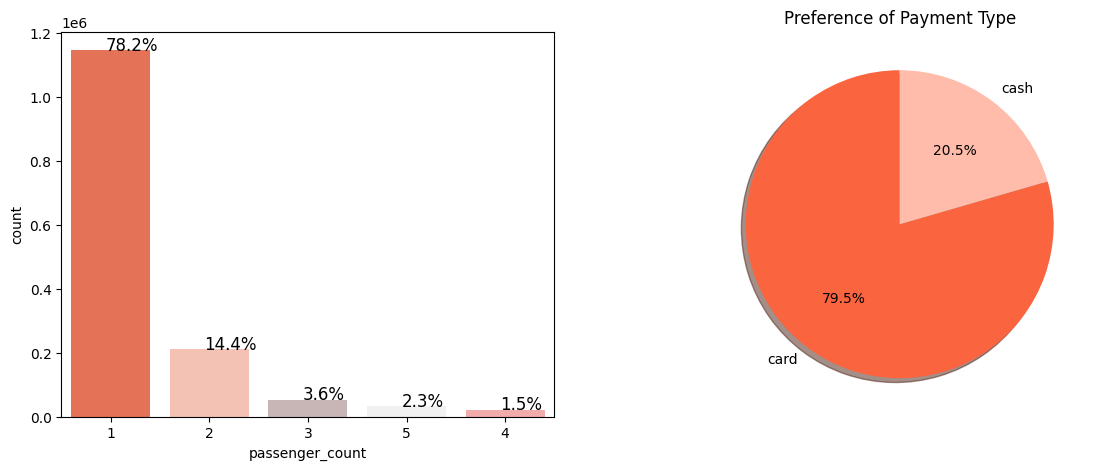

In [29]:
fig1, axes1 =plt.subplots(1,2,figsize=(14, 5))


order = df['passenger_count'].value_counts(ascending=False).index # to display bar in ascending order
axis=sns.countplot(x='passenger_count', data=df , order=order,ax=axes1[0],palette=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'],)
bar_perc(axes1[0],df['passenger_count'])


plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
startangle = 90, shadow =True, autopct = '%1.1f%%', colors = ['#FA643F', '#FFBCAB' ])
plt. show()


### Observations

1. **Payment Method:**
   - Observations indicate that credit card usage is higher than cash usage. The proportion of credit card users is 79.5%.

2. **Passenger Preferences:**
   - A count plot of passenger counts shows that 78% of customers prefer to travel alone.

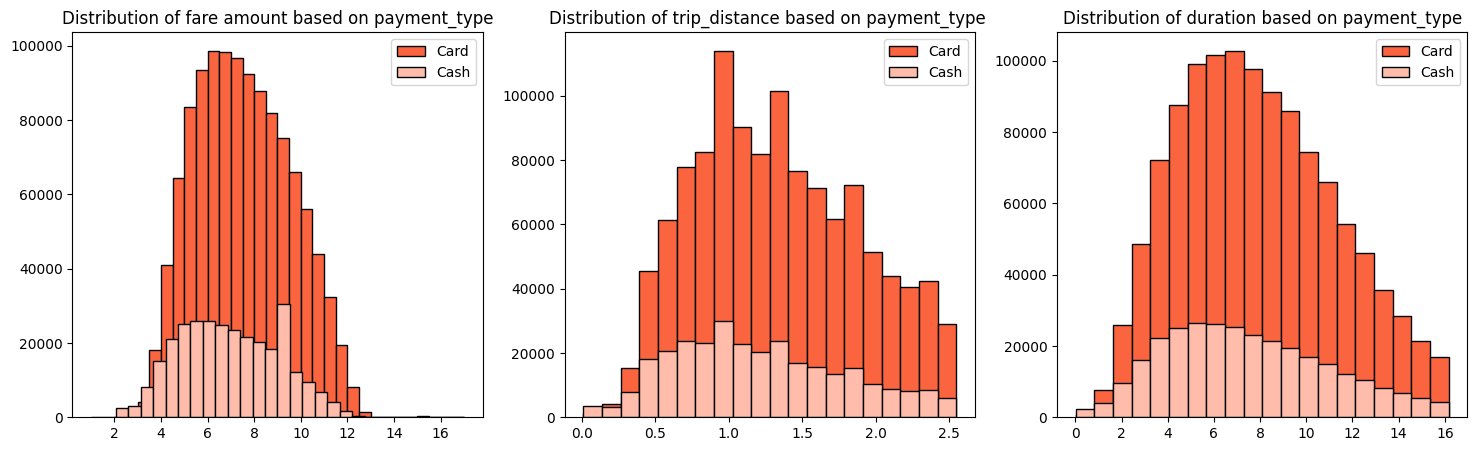

In [30]:
plt.figure(figsize=(18,5))
plt. subplot (1,3,1)
plt.title( 'Distribution of fare amount based on payment_type')
plt.hist(df [df['payment_type']=='card']['fare_amount'], histtype= 'barstacked', bins = 30, edgecolor = 'k', color ='#FA643F', label = 'Card')
plt.hist(df [df['payment_type']=='cash']['fare_amount'], histtype= 'barstacked', bins = 30, edgecolor ='k', color ='#FFBCAB', label = 'Cash')
plt. legend ()

plt. subplot (1,3,2)
plt.title( 'Distribution of trip_distance based on payment_type ')
plt.hist(df [df['payment_type']=='card']['trip_distance'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color ='#FA643F', label = 'Card')
plt.hist(df [df['payment_type']=='cash']['trip_distance'], histtype= 'barstacked', bins = 20, edgecolor ='k', color ='#FFBCAB', label = 'Cash')
plt. legend ()

plt. subplot (1,3,3)
plt.title( 'Distribution of duration based on payment_type')
plt.hist(df [df['payment_type']=='card']['duration'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color ='#FA643F', label = 'Card')
plt.hist(df [df['payment_type']=='cash']['duration'], histtype= 'barstacked', bins = 20, edgecolor ='k', color ='#FFBCAB', label = 'Cash')
plt. legend ()
plt. show()

### Findings Based on Payment Type Distributions

1. **Distribution of Fare Amount:**
   - The distribution of fare amounts indicates that card payments are more common than cash payments across various fare amounts. Card payments consistently show higher frequencies, with a peak around 8 units, whereas cash payments peak slightly lower.

2. **Distribution of Trip Distance:**
   - The trip distance distribution shows that passengers using card payments tend to travel slightly longer distances compared to those using cash. The highest frequency for card payments is around 1.0 to 1.5 units, while cash payments peak similarly but at lower frequencies.

3. **Distribution of Trip Duration:**
   - The duration distribution reveals that card payments are more frequent than cash payments for trips of all durations. The highest frequency for both payment types is around 6 to 8 units, with card payments showing a higher overall count.

These distributions suggest that card payments are more prevalent across different fare amounts, trip distances, and trip durations, indicating a general preference for using cards over cash for taxi travel.

In [31]:
df.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
card            7.293782  2.048469      1.333271  0.559120
cash            6.923577  2.125770      1.210815  0.578136


### Findings

1. **Fare Amount:**
   - Card payments have a slightly higher average fare amount (7.29) compared to cash payments (6.92).

2. **Trip Distance:**
   - Card payments are associated with longer average trip distances (1.33) compared to cash payments (1.21).

In summary, customers using cards tend to have higher fare amounts and travel longer distances on average compared to those using cash.

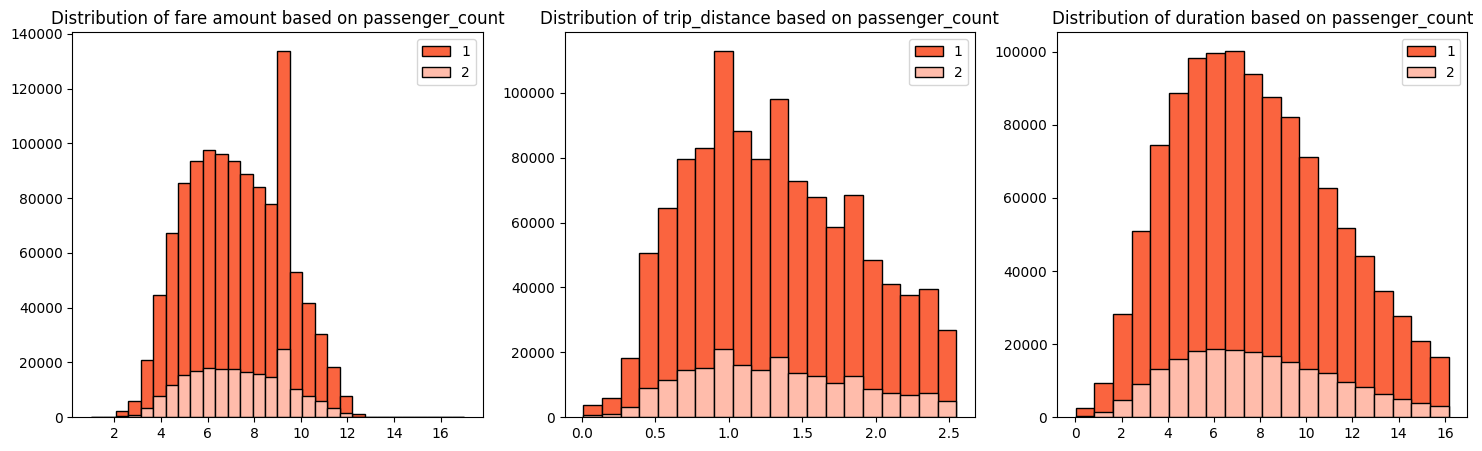

In [32]:
plt.figure(figsize=(18,5))
plt. subplot (1,3,1)
plt.title( 'Distribution of fare amount based on passenger_count')
plt.hist(df [df['passenger_count']==1]['fare_amount'], histtype= 'barstacked', bins = 30, edgecolor = 'k', color ='#FA643F', label = '1')
plt.hist(df [df['passenger_count']==2]['fare_amount'], histtype= 'barstacked', bins = 30, edgecolor ='k', color ='#FFBCAB', label = '2')
plt. legend ()

plt. subplot (1,3,2)
plt.title( 'Distribution of trip_distance based on passenger_count')
plt.hist(df [df['passenger_count']==1]['trip_distance'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color ='#FA643F', label = '1')
plt.hist(df [df['passenger_count']==2]['trip_distance'], histtype= 'barstacked', bins = 20, edgecolor ='k', color ='#FFBCAB', label = '2')
plt. legend ()

plt. subplot (1,3,3)
plt.title( 'Distribution of duration based on passenger_count')
plt.hist(df [df['passenger_count']==1]['duration'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color ='#FA643F', label = '1')
plt.hist(df [df['passenger_count']==2]['duration'], histtype= 'barstacked', bins = 20, edgecolor ='k', color ='#FFBCAB', label = '2')
plt. legend ()
plt. show()

### Findings Based on Passenger Count Distributions

1. **Fare Amount:**
   - Single passengers (count of 1) have higher frequencies of fare amounts compared to groups of two passengers. The peak fare amount for single passengers is around 8 units.

2. **Trip Distance:**
   - Trips with a single passenger tend to cover slightly longer distances, with the highest frequency around 1.0 units, compared to trips with two passengers.

3. **Trip Duration:**
   - Single passengers have higher trip durations across all duration ranges, peaking around 6 to 8 units.

In [33]:
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns ={'passenger_count': 'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [34]:
passenger_count['perc'] = (passenger_count['count']/passenger_count ['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,913357,62.367155
1,card,2,166487,11.368304
2,card,3,41425,2.828641
3,card,4,16138,1.101958
4,card,5,26676,1.821529
5,cash,1,232503,15.876104
6,cash,2,44530,3.040661
7,cash,3,11436,0.780889
8,cash,4,5253,0.358693
9,cash,5,6679,0.456065


In [35]:
py = pd. DataFrame (columns = ['payment_type', 1,2,3,4,5])
py['payment_type'] = ['Card', 'Cash']
py.iloc[0,1:] = passenger_count.iloc [0:5,-1]
py.iloc[1,1:] = passenger_count.iloc [5:,-1]
py

,payment_type,1,2,3,4,5
0,Card,62.367155,11.368304,2.828641,1.101958,1.821529
1,Cash,15.876104,3.040661,0.780889,0.358693,0.456065


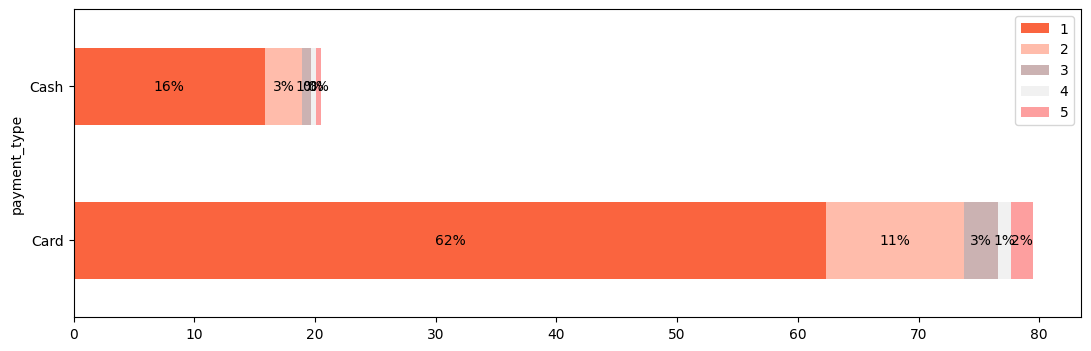

In [36]:
fig, ax = plt.subplots(figsize=(13,4))
py.plot(x='payment_type', kind = 'barh', stacked = True, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'],ax=ax)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center', 
            verticalalignment ='center')

plt.show() 

### Findings

1. **Payment Method Preference:**
   - Our findings suggest that using a card for taxi travel is the most frequent payment method compared to cash.

2. **Single Travelers:**
   - 62% of customers who travel alone prefer to use a card as their payment method, whereas only 16% of single travelers prefer to use cash.

3. **Traveling with Two Persons:**
   - Customers who travel with one other person also prefer to use a card as their payment method.

# statistical analysis and Hypothisis testing

It's time to performe statistical analysis and hypothisis testing to determine our observation .

after applying EDA on datasert , we have found lot's of information.now i'll conduct some hypothisis testing to insure our observation and insight from sample dataset is true or not.


# > Hypothisis 

* **Null hypothesis**: There is no difference in average fare between customers who use credit cards and customers who use cash.

* **Alternative hypothesis**: There is a difference in average fare between customers who use credit cards and customers who use cash

In [37]:
card_sample = df[df['payment_type']=='card']['fare_amount']
cash_sample = df[df['payment_type']=='cash']['fare_amount']

In [38]:
print(card_sample.shape)
print(cash_sample.shape)

(1164083,)
(300401,)


**Assumptions**:
* Normality of the sample data.
* Independence of observations.

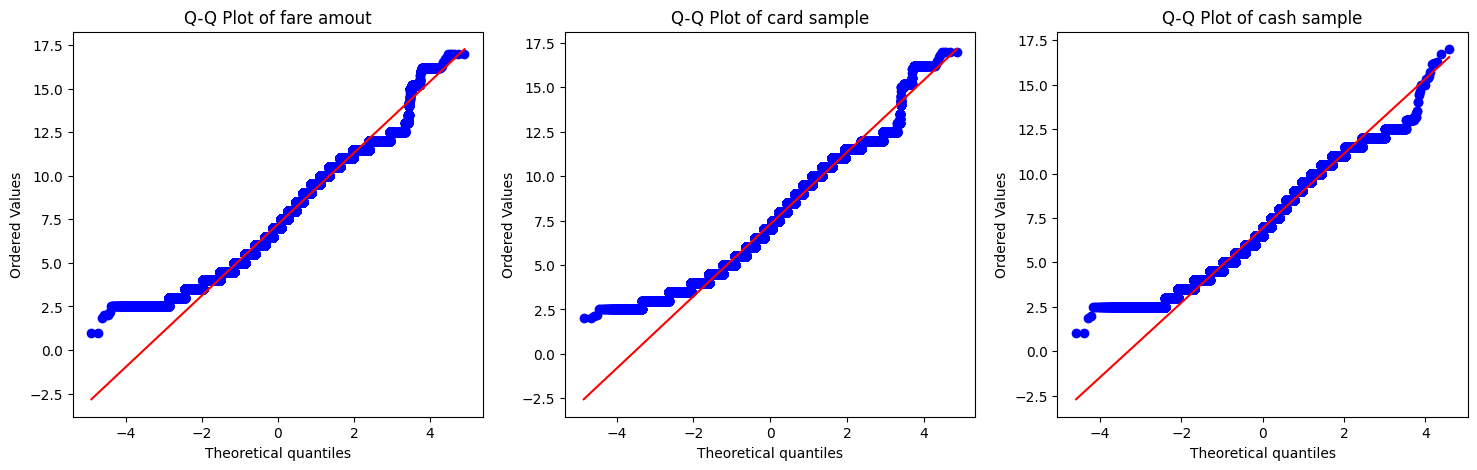

In [39]:
# for normality i'm picking QQ plot
import scipy.stats as stats

plt.figure(figsize=(18,5))
plt. subplot (1,3,1)
stats.probplot(df['fare_amount'], dist="norm", plot=plt)
plt.title('Q-Q Plot of fare amout')

plt. subplot (1,3,2)
stats.probplot(card_sample, dist="norm", plot=plt)
plt.title('Q-Q Plot of card sample')

plt. subplot (1,3,3)
stats.probplot(cash_sample, dist="norm", plot=plt)
plt.title('Q-Q Plot of cash sample')
plt.show()


The Q-Q plot for fare amount shows that the data does not perfectly follow the theoretical distribution. There are deviations from the red line, especially for higher quantiles, indicating  heavy tails in the fare amount data.data seem like normal but little bit skwed.

In [40]:
from scipy.stats import shapiro

stat, p = shapiro(df['fare_amount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.973, p=0.000
Sample does not look Gaussian (reject H0)


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [41]:
from scipy.stats import levene

stat, p = levene(cash_sample,card_sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Variances are equal (fail to reject H0)')
else:
    print('Variances are not equal (reject H0)')


Statistics=595.506, p=0.000
Variances are not equal (reject H0)


# Test of hypothisis

In [42]:
from scipy.stats import  ttest_ind
t_stats, P_value = ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T statistic', t_stats, 'p-value', P_value)

# Interpretation of t-test
if P_value > 0.05:
    print('Fail to reject H0: No significant difference between the means of the two groups.')
else:
    print('Reject H0: Significant difference between the means of the two groups.')

T statistic 85.72952724286074 p-value 0.0
Reject H0: Significant difference between the means of the two groups.


In [43]:
from scipy.stats import mannwhitneyu


stat, p = mannwhitneyu(card_sample, cash_sample)
print('Mann-Whitney U Test: Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Mann-Whitney U Test: Statistics=192546236393.000, p=0.000
Different distribution (reject H0)


# Regression analysis

* Split Data into Training and Testing Sets
* Fit the Model
* Evaluate the Model
* Interpret the Results


In [44]:

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


In [45]:
df = pd.get_dummies(df, columns=['payment_type'], prefix='payment')

In [46]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,airport_fee,duration,payment_card,payment_cash
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.10,8.0,0.0,8.400000,True,False
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,7.5,0.0,8.966667,True,False
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,8.0,0.0,10.033333,False,True
7,2,2022-01-01 00:13:04,2022-01-01 00:22:45,1,2.02,9.0,0.0,9.683333,False,True
9,2,2022-01-01 00:48:52,2022-01-01 00:53:28,1,0.78,5.0,0.0,4.600000,False,True


In [47]:
X = df[['passenger_count', 'trip_distance','duration','payment_card']]
y = df['fare_amount']


                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.056e+07
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:38:06   Log-Likelihood:            -3.9918e+05
No. Observations:             1171587   AIC:                         7.984e+05
Df Residuals:                 1171582   BIC:                         7.984e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2181      0.000    2.3e+04      0.0

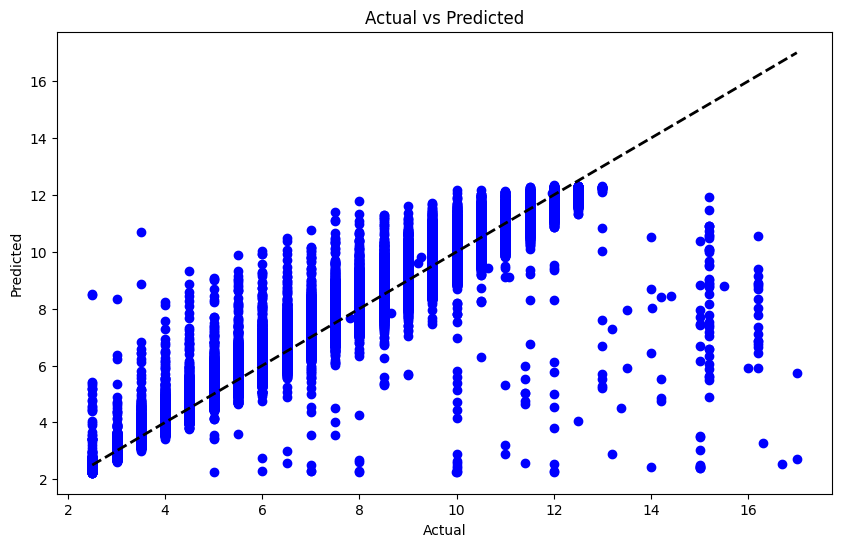

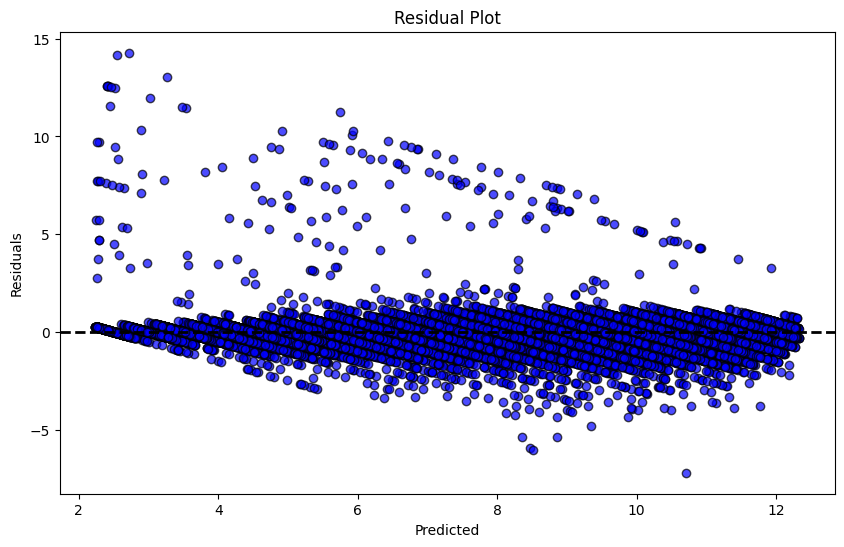

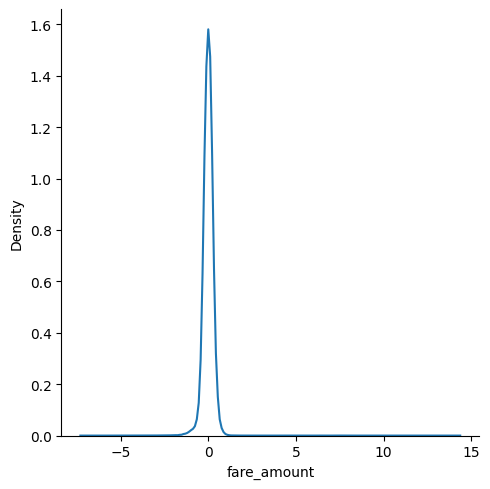

In [48]:




# One-hot encoding for payment_type column


# Define the dependent variable (fare_amount) and independent variables


# Standard scaling for independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)

X_train_sm = sm.add_constant(X_train)  # add a constant term for the intercept
model = sm.OLS(y_train, X_train_sm).fit()

# Print the model summary
print(model.summary())



# Fit the model using scikit-learn
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


sns. displot(residuals,kind='kde')

In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score




In [50]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,airport_fee,duration,payment_card,payment_cash
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.10,8.0,0.0,8.400000,True,False
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,7.5,0.0,8.966667,True,False
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,8.0,0.0,10.033333,False,True
7,2,2022-01-01 00:13:04,2022-01-01 00:22:45,1,2.02,9.0,0.0,9.683333,False,True
9,2,2022-01-01 00:48:52,2022-01-01 00:53:28,1,0.78,5.0,0.0,4.600000,False,True


Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.00      0.00     59898
        True       0.80      1.00      0.89    232999

    accuracy                           0.80    292897
   macro avg       0.90      0.50      0.44    292897
weighted avg       0.84      0.80      0.70    292897


Confusion Matrix:
[[     5  59893]
 [     0 232999]]


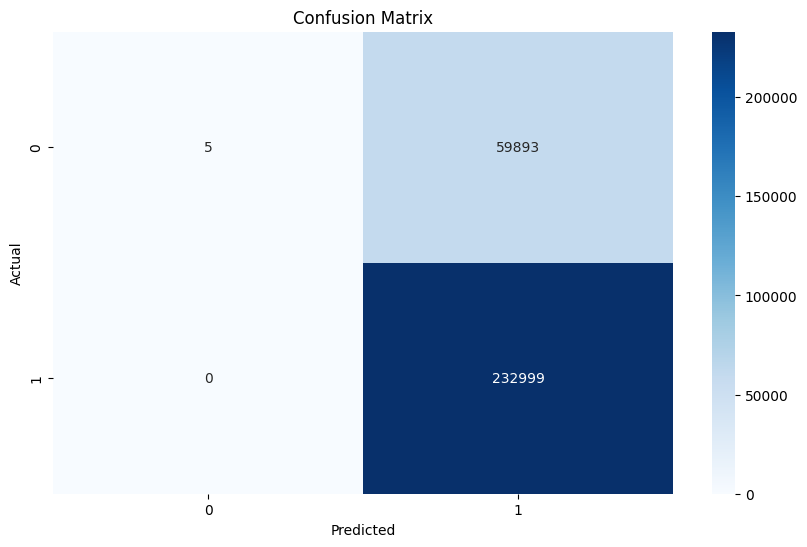

In [51]:



# Define the dependent variable (payment_type) and independent variables
X = df[['passenger_count', 'trip_distance', 'duration', 'fare_amount']]
y = df['payment_card']




# Standard scaling for independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(class_report)
print('\nConfusion Matrix:')
print(conf_matrix)

# Plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




this Confusion Matrix incates that our machine learning model are having errors with reference to  pridect type 1 errors a lot. which mean's we predict that 59893 people also use credit card  however they are not. it's false positive .